# Omówienie modelu jednokompartmentowego wchłaniania i eliminacji leków
### Autorzy: Nadia Moska (277499) i Nikodem Drelak (277426)

## Spis treści
1. [Wstęp i definicja](#Wstęp-i-definicja)
    * [Cel pracy i motywacja](#Cel-pracy-i-motywacja)
    * [Historia farmakokinetyki](#Historia-farmakokinetyki)
2. [Podstawowe parametry farmakokinetyczne](#Podstawowe-parametry-farmakokinetyczne)
    * [Objętość dystrybucji](#Objętość-dystrybucji)
    * [Stała eliminacji](#Stała-eliminacji)
    * [Dostępność biologiczna](#Dostępność-biologiczna)
    * [Biologiczny okres półtrwania](#Biologiczny-okres-półtrwania)
    * [Pole pod krzywą](#Pole-pod-krzywą)
3. [Podanie dożylne](#Podanie-dożylne)
4. [Podanie doustne](#Podanie-doustne)
5. [Symulacja wchłaniania i eliminacji leku](#Symulacja-wchłaniania-i-eliminacji-leku)
    * [Jawna metoda Eulera](#Jawna-metoda-Eulera)
    * [Metoda Rungego-Kutty IV rzędu](#Metoda-Rungego-Kutty-IV-rzędu)
    * [Implementacja algorytmów](#Implementacja-algorytmów)
    * [Porównanie metod numerycznych korzystając z przypadku podania dożylnego](#Porównanie-metod-numerycznych-korzystając-z-przypadku-podania-dożylnego)
    * [Wyznaczanie parametrów farmakokinetycznych na podstawie dostępnych danych](#Wyznaczanie-parametrów-farmakokinetycznych-na-podstawie-dostępnych-danych)
6. [Podsumowanie](#Podsumowanie)
7. [Przypisy](#Przypisy)

## Wstęp i definicja

Farmakokinetyka bada procesy biotransformacji, dystrybucji i wchłaniania (głównie) leków i ich metabolitów oraz ich eliminacji z organizmu w czasie. Rzeczywiste procesy zachodzące w organiźmie są na tyle skomplikowane, że ich pełny opis jest niemożliwy. Natomiast w wielu przypadkach udaje się stworzyć przybliżony, ale wystarczająco dokładny model. Umiejętne wykorzystanie modeli farmakokinetycznych ułatwia dostosowanie dawkowania, a tym samym zmniejszenie ryzyka wystąpienia niepożądanych efektów ubocznych u chorego.

Jednym z najprostszych modeli pozwalających na matematyczny opis losu leku w organizmie jest **model kompartmentowy**. Organizm ludzki składa się z wielu różnych rodzajów tkanek, jednak wiele tkanek wykazuje podobne własności wobec badanego leku. Model kompartmentowy zakłada, że organizm składa się z jednego lub kilku kompartmentów, czyli zbiorów takich "podobnych" tkanek [1]. W naszej pracy skupimy się na modelu **jednokompartmentowym**, czyli zakładającym, że wszystkie tkanki zachowują się w ten sam sposób wobec badanej substancji.

#### Cel pracy i motywacja

Celem jest przedstawienie modelowania farmakokinetyki leku przy użyciu równań różniczkowych opisujących jego wchłanianie, dystrybucję, metabolizm i eliminację. Projekt obejmuje zarówno analityczne, jak i numeryczne rozwiązania tych równań oraz analizę ich zgodności z danymi eksperymentalnymi.

Odpowiednie dawkowanie leków zwiększa skuteczność terapii i zmniejsza ryzyko skutków ubocznych. Farmakokinetyka umożliwia precyzyjne ustalenie optymalnych dawek, które zapewniają maksymalny efekt terapeutyczny przy minimalnym ryzyku toksyczności. Modele matematyczne pozwalają indywidualnie dostosować terapię, zwiększając jej bezpieczeństwo i efektywność.


#### Historia farmakokinetyki

Farmakokinetyka, jako dziedzina nauki zajmująca się badaniem losów leków w organizmach żywych, ma swoje korzenie w początkach XX wieku, kiedy to zaczęto dostrzegać znaczenie analizowania procesów związanych z wchłanianiem, dystrybucją, metabolizowaniem i wydalaniem leków (ADME). W pierwszych latach rozwoju farmakokinetyki podstawowe badania koncentrowały się głównie na prostych pomiarach stężenia leków w organizmach. Jednakże to dopiero rozwój technologii analitycznych w drugiej połowie XX wieku, takich jak chromatografia gazowa i cieczowa, a także techniki spektrometrii mas, umożliwił szczegółowe badanie tych procesów na poziomie molekularnym.

W latach 50. i 60. XX wieku zaczęły pojawiać się pierwsze modele matematyczne opisujące farmakokinetykę, takie jak modele jednokomorowe, które traktowały organizm jako pojedynczy „pojemnik” dla leku. Następnie, z biegiem lat, wprowadzono bardziej skomplikowane modele wielokomorowe, które pozwalały na dokładniejsze odwzorowanie procesów farmakokinetycznych w różnych tkankach ciała. W miarę postępu technologii, badania farmakokinetyczne stały się niezbędnym elementem w opracowywaniu nowych leków oraz w indywidualizacji terapii.

Dzięki osiągnięciom farmakokinetyki, w dzisiejszych czasach możliwe jest dokładne przewidywanie reakcji organizmu na leki, co przyczynia się do lepszej skuteczności leczenia oraz zmniejszenia ryzyka działań niepożądanych [2].

## Podstawowe parametry farmakokinetyczne

W celu zbudowania modelu, potrzebujemy zdefiniować kilka parametrów definiujących różne właściwości leku.

#### Objętość dystrybucji

Objętość dystrybucji (oznaczana jako $V_{d}$) to hipotetyczna objętość płynów ustrojowych, w której lek byłby rozmieszczony
równomiernie, aby osiągnąć takie samo stężenie, jakie obserwujemy we krwi.
$$ V_{d} = \frac{D}{C}, $$
gdzie:
* $D$ - podana dawka leku,
* $C$ - stężenie leku we krwi po rozmieszaniu.

#### Stała eliminacji
Stała eliminacji $k_{e}$ opisuje szybkość, z jaką lek jest usuwany z organizmu. Całkowitą stałą eliminacji można wyrazić jako sumę stałych eliminacji nerkowej $k_{ren}$ i nienerkowej $k_{nren}$:
$$ k_{e} = k_{ren} + k_{nren}. $$
Stała eliminacji nerkowej $k_{ren}$ odnosi się do eliminacji leku przez nerki, natomiast stała eliminacji nienerkowej $k_{nren}$ uwzględnia eliminację przez inne drogi, takie jak metabolizm w wątrobie czy wydalanie z żółcią.

#### Dostępność biologiczna

Dostępność biologiczna $F$ określa ułamek podanej dawki leku, który dociera do krążenia systemowego w postaci niezmienionej. Jest wyrażana jako wartość procentowa i zależy od drogi podania leku. Matematycznie można ją obliczyć jako stosunek pola pod krzywą ($AUC$) stężenia leku w osoczu po podaniu pozanaczyniowym (np. doustnym) do $AUC$ po podaniu dożylnym:
$$ F = \left( \frac{\text{AUC}_{\text{po}}}{\text{AUC}_{\text{iv}}} \right) \times 100 \%. $$




#### Biologiczny okres półtrwania
Okres półtrwania to czas potrzebny do zmniejszenia ilości leku we krwi o połowę. Wyprowadzamy go z równania
$$ C(t_{1/2}) = \frac{1}{2} C_{0}. $$
Jest obliczany na podstawie stałej szybkości eliminacji $k_{e}$:
$$ t_{1/2} = \frac{\ln{2}}{k_{e}} \approx \frac{0.693}{k_{e}}. $$

#### Pole pod krzywą
$AUC$ reprezentuje całkowitą ekspozycję organizmu na lek i jest obliczane na podstawie stężenia leku w funkcji czasu:
$$ AUC = \int_{0}^{\infty} C(t) dt. $$

###### Wzory z rozdziału *Podstawowe parametry farmakokinetyczne* zostały zaczerpnięte z [3], [4].

## Podanie dożylne

Transport leku po podaniu dożylnym możemy (w uproszczeniu) opisać równaniem różniczkowym uwzględniającym eliminację zgodnie z kinetyką pierwszego rzędu. Zakładamy, że eliminacja leku zachodzi w stałym tempie, proporcjonalnie do jego stężenia we krwi. Dodatkowo, przyjmujemy, że lek natychmiastowo rozprowadza się po organizmie (trafia do układu krążenia bez opóźnienia), a jego dystrybucja jest natychmiastowa i równomierna. Na podstawie tych założeń możemy opisać zmiany stężenia leku w organizmie. Niech
* $ X_{D} $ – początkowa ilość leku podana dożylnie;
* $ X(t) $ – ilość leku we krwi (reprezentującej cały kompartment) w czasie $ t $;
* $ k_{e} $ - stała eliminacji;
* $ V_d $ – objętość dystrybucji.

Zgodnie z kinetyką pierwszego rzędu, eliminacja leku jest opisana równaniem
$$ \require{physics} \dv{X(t)}{t} = -k_{e}X(t). $$
Rozwiązując je metodą rozdzielenia zmiennych otrzymujemy nasze równanie funkcji zależności ilości leku we krwi od czasu:
$$ X(t) = X_{D} e^{-k_{e}t}. $$
Ponieważ, zakładając że ilość leku w organizmie jest odwrotna niż ilość leku poza organizmem, zachodzi
$$ \require{physics} -\dv{X(t)}{t} = k_{e}X(t) = k_{ren}X(t) + k_{nren}X(t) = \dv{U(t)}{t} + \dv{B(t)}{t} \tag{$\ast$}. $$
Korzystając z $($$\ast$$)$, możemy wyznaczyć odpowiednio funkcje:
* $ U(t) $ - ilość leku wydalona drogą nerkową (z moczu);
* $ B(t) $ - ilość leku wydalona drogami pozanerkowymi (z żółcią oraz jako metabolity w osoczu).

Zatem nasz model wchłaniania i wydalania leku możemy opisać układem równań:
$$ \begin{cases}
\dv{X(t)}{t} = -k_{e}X(t)\\
\dv{U(t)}{t} = k_{ren}X(t)\\
\dv{B(t)}{t} = k_{nren}X(t).
\end{cases} $$
Po rozwiązaniu ma on postać:
$$ \begin{cases}
X(t) = X_{D} e^{-k_{e}t}\\
U(t) = \frac{k_{ren}}{k_{e}} X_{D} (1-e^{-k_{e}t})\\
B(t) = \frac{k_{nren}}{k_{e}} X_{D} (1-e^{-k_{e}t}).
\end{cases} $$
Chcąc wyznaczyć stężenie leku we krwi (ponieważ, doświadczalnie, nie da się wyznaczyć jego całkowitej ilości w organizmie), możemy podstawić
$$ C = \frac{D}{V_{d}}, $$
gdzie $C$ to stężenie, $D$ to ilość leku, a $V_{d}$ - objętość dystrybucji. $V_{d}$ jest stała, dlatego, na przykład, dla $X(t)$ dostajemy
$$ C(t) = C_{0} e^{-k_{e}t}, $$
gdzie $C_{0}$ to stężenie początkowe.
Ponadto, możemy wziąć pod uwagę dostępność biologiczną $F$, aby dokładniej opisać eliminację leku. Wtedy:
$$ -C(t) = C_{0}F e^{-k_{e}t}. $$

## Podanie doustne

W przypadku podania doustnego, lek musi przejść przez przewód pokarmowy, wchłonąć się do krążenia ogólnego i dopiero wtedy rozprowadza się w organizmie. Proces ten obejmuje uwolnienie leku z postaci, jego wchłanianie, dystrybucję, metabolizm i eliminację. Załóżmy, że
* $ X_{D}$ - dawka początkowa leku;
* $ X_{A}(t) $ - ilość leku przed wchłonięciem w czasie $ t $;
* $ X_{E}(t) $ - wydalona ilość leku (wszystkimi drogami) w czasie $ t $;
* $ X(t) $ - ilość leku we krwi w czasie $ t $;
* $ k_{a} $, $ k_{e} $ - stałe, odpowiednio, wchłaniania i eliminacji.

Model jednokompartmentowy zakłada kinetykę pierwszego rzędu dla wchłaniania i eliminacji. Nasz model może być opisany przez układ równań opisujący kolejno: ilość w miejscu wchłaniania, ilość wydaloną, oraz całkowitą ilość leku we krwi. Najpierw zapiszmy układ równań rózniczkowych opisujący szybkość tych zmian.
$$ \begin{cases} \require{physics}
\dv{X_{A}(t)}{t} = -k_{a} X_{A}(t)\\
\dv{X_{E}(t)}{t} = k_{e} X(t)\\
\dv{X(t)}{t} = k_{a} X_{A}(t) - k_{e} X(t) = -\left(\dv{X_{A}(t)}{t} + \dv{X_{E}(t)}{t}\right).
\end{cases} $$
Układ równań po rozwiązaniu:
$$ \begin{cases} \require{physics}
X_{A}(t) = X_{D} e^{-k_{a} t}\\
X_{E}(t) = X_{D} - X_{A}(t) - X(t)\\
X(t) = \frac{k_{a} X_{D}}{k_{a} - k_{e}} \left( e^{-k_{e} t} - e^{-k_{a} t} \right).
\end{cases} $$
Podobnie jak w podaniu dożylnym, tutaj także uzyskamy stężenie leku we krwi $C(t)$, dzieląc ilość leku przez objętość dystrybucji $V_{d}$:
$$C(t) = \frac{X(t)}{V_{d}} = \frac{k_{a} X_{D}}{V_{d} (k_{a} - k_{e})} \left(e^{-k_{e} t} - e^{-k_{a} t}\right),$$
gdzie $D$ to dawka początkowa leku.

###### Wzory z rozdziałów *Podanie dożylne*, *Podanie doustne* zostały zaczerpnięte z [4], [5].

## Symulacja wchłaniania i eliminacji leku

Aby pokazać dynamikę wchłaniania się leków w bardziej przystępny sposób, skorzystamy z komputerowych narzędzi do rozwiązywania i przedstawiania równań różniczkowych - Pythona, biblioteki MatPlotLib oraz interaktywnych widżetów pozwalających na zmianę parametrów. Zanim przedstawimy wykresy, zaimplementujemy różne numeryczne metody rozwiązywania równań różniczkowych, aby później sprawdzić ich akuratność wobec danych doświadczalnych.

#### Jawna metoda Eulera

Jest najprostsza do implementacji, ale też najmniej dokładna. Służy do rozwiązywania równań różniczkowych pierwszego rzędu w postaci
$$ \require{physics} \dv{y}{x} = f(x, y),\quad y(0) = y_{0}. $$
Przedstawiana jest wzorem:
$$ y_{n} = y_{n-1} + hf(x_{n-1}, y_{n-1}),$$
gdzie $x_{n} = nh$ jest naszą "siatką", a $h > 0$ określa jej rozstaw [6].



#### Metoda Rungego-Kutty IV rzędu

Algorytm Rungego-Kutty IV rzędu jest bardziej skomplikowany, ale daje dokładniejsze przybliżenie niż metoda Eulera [7]. Opisuje go wzór
$$ y_{n} = y_{n-1} + \frac{1}{6}(k_{1}+2k_{2}+2k_{3}+k_{4}),$$
gdzie:
$$ k_1 = hf(x_{n-1},y_{n-1}); $$
$$ k_2 = hf(x_{n-1} + \frac{h}{2}, y_{n-1} + \frac{k_{1}}{2}); $$
$$ k_3 = hf(x_{n-1} + \frac{h}{2}, y_{n-1} + \frac{k_{2}}{2}); $$
$$ k_4 = hf(x_{n-1} + h, y_{n-1} + k_{3}). $$

###### Wzory z podrozdziałów *Jawna metoda Eulera*, *Metoda Rungego-Kutty IV rzędu* zostały zaczerpnięte z [6], [7].

#### Implementacja algorytmów

Do zaimplementowania powyższych metod skorzystamy z języka programowania **Python** oraz bibliotek **Matplotlib** oraz **NumPy**. Aby zapewnić interaktywność wykresów, użyjemy narzędzia **IPyWidgets**.


In [1]:
from matplotlib import pyplot as plt
import numpy as np
from ipywidgets import interact, fixed
import ipywidgets as widgets


Teraz zdefiniujemy funkcje `euler_forward` oraz `runge_kutta`.


In [2]:
def euler_forward(func, y_0, t, h):
    """Funkcja, która zwraca rozwiązane równanie różniczkowe metodą numeryczną Eulera dla podanych wartości"""
    x_values = np.arange(0, t, h)
    y_values = np.zeros((len(x_values), len(y_0)))
    y_values[0] = y_0

    for n in range(1, len(x_values)):
        y_values[n] = y_values[n-1] + h * func(x_values[n-1], y_values[n-1])

    return x_values, y_values

def runge_kutta(func, y_0, t, h):
    """Funkcja, która zwraca rozwiązane równanie różniczkowe metodą numeryczną Rungego-Kutty dla podanych wartości"""
    x_values = np.arange(0, t, h)
    y_values = np.zeros((len(x_values), len(y_0)))
    y_values[0] = y_0

    for n in range(1, len(x_values)):
        k1 = h * func(x_values[n - 1], y_values[n - 1])
        k2 = h * func(x_values[n - 1] + h / 2, y_values[n - 1] + k1 / 2)
        k3 = h * func(x_values[n - 1] + h / 2, y_values[n - 1] + k2 / 2)
        k4 = h * func(x_values[n - 1] + h, y_values[n - 1] + k3)

        y_values[n] = y_values[n - 1] + (1 / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

    return x_values, y_values


#### Porównanie metod numerycznych korzystając z przypadku podania dożylnego

Najpierw stwórzmy wykres - załóżmy, że podano dożylnie 100mg pewnego leku. Nasze parametry $k_{ren}$ oraz $k_{nren}$ możemy zmieniać za pomocą suwaków, tak samo jak rozstaw siatki $h$. Dzięki temu możemy lepiej obserwować jak zmienia się dokładność w zależności od zarówno szybkości zmian ilości leku, jak i "dokładności" naszej metody numerycznej.


In [3]:
def injection_graph(initial_dose=100, renal_rate=0.05, nonrenal_rate=0.1, time=50, grid=1):
    def equations(t, y):
        """Funkcja, która zwraca f(x,y) dla odpowiednich równań, aby później przygotować rozwiązania numeryczne."""
        y_vein, y_renal, y_nonrenal, y_all = y
        dy_vein = -(renal_rate + nonrenal_rate) * y_vein
        dy_renal = renal_rate * y_vein
        dy_nonrenal = nonrenal_rate * y_vein
        dy_all = (renal_rate + nonrenal_rate) * y_vein
        return np.array([dy_vein, dy_renal, dy_nonrenal, dy_all])

    def analytical(y_0, t, spacing=0.1):  # odstępy siatki stałe i jak najmniejsze, żeby lepiej porównać z numerycznymi
        """Funkcja, która zwraca rozwiązania analityczne dla odpowiednich równań."""
        x_values = np.arange(0, t, spacing)
        total_rate = renal_rate + nonrenal_rate
        y_vein = y_0 * np.exp(-total_rate * x_values)
        y_renal = y_0 * (renal_rate / total_rate) * (1 - np.exp(-total_rate * x_values))
        y_nonrenal = y_0 * (nonrenal_rate / total_rate) * (1 - np.exp(-total_rate * x_values))
        y_all = y_0 * (1 - np.exp(-total_rate * x_values))
        return x_values, y_vein, y_renal, y_nonrenal, y_all

    y_dose = [initial_dose, 0, 0, 0]  # [lek we krwi, lek wydalony z moczem, lek wydalony nienerkowo, lek wydalony w całości]

    # Rozwiązywanie równań i przyporządkowanie ich wyników do odpowiednich tablic
    x_values_rk, y_values_rk = runge_kutta(equations, y_dose, time, grid)
    y_vein_rk, y_renal_rk, y_nonrenal_rk, y_all_rk = y_values_rk.T
    x_values_eul_f, y_values_eul_f = euler_forward(equations, y_dose, time, grid)
    y_vein_eul_f, y_renal_eul_f, y_nonrenal_eul_f, y_all_eul_f = y_values_eul_f.T
    x_values_analytical, y_vein_analytical, y_renal_analytical, y_nonrenal_analytical, y_all_analytical = analytical(initial_dose, time)

    # Rysowanie wykresu
    plt.figure(figsize=(10, 8))
    plt.style.use('seaborn-v0_8-dark')
    plt.suptitle("Porównanie metod numerycznych z metodą analityczną", fontweight='bold', fontsize=15)

    # Wykres porównujący rozwiązanie analityczne i metodą Rungego-Kutty
    plt.subplot(2, 1, 1)
    plt.plot(x_values_analytical, y_vein_analytical, 'r', label="Analityczna - lek we krwi")
    plt.plot(x_values_analytical, y_renal_analytical, 'y', label="Analityczna - lek wydalony (mocz)")
    plt.plot(x_values_analytical, y_nonrenal_analytical, 'b', label="Analityczna - lek wydalony (nienerkowo)")
    plt.plot(x_values_analytical, y_all_analytical, 'g', label="Analityczna - lek wydalony (całość)")

    plt.plot(x_values_rk, y_vein_rk, 'r--', label="Rungego-Kutty - lek we krwi")
    plt.plot(x_values_rk, y_renal_rk, 'y--', label="Rungego-Kutty - lek wydalony (mocz)")
    plt.plot(x_values_rk, y_nonrenal_rk, 'b--', label="Rungego-Kutty - lek wydalony (nienerkowo)")
    plt.plot(x_values_rk, y_all_rk, 'g--', label="Rungego-Kutty - lek wydalony (całość)")

    plt.title("Porównanie metody analitycznej i Rungego-Kutty")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True)
    plt.xlabel("Czas (godziny)")
    plt.ylabel("Stężenie (mg)")
    plt.grid()

    # Wykres porównujący rozwiazanie analityczne i metodą Eulera
    plt.subplot(2, 1, 2)
    plt.plot(x_values_analytical, y_vein_analytical, 'r', label="Analityczna - lek we krwi")
    plt.plot(x_values_analytical, y_renal_analytical, 'y', label="Analityczna - lek wydalony (mocz)")
    plt.plot(x_values_analytical, y_nonrenal_analytical, 'b', label="Analityczna - lek wydalony (nienerkowo)")
    plt.plot(x_values_analytical, y_all_analytical, 'g', label="Analityczna - lek wydalony (całość)")

    plt.plot(x_values_eul_f, y_vein_eul_f, 'r:', label="Eulera - lek we krwi")
    plt.plot(x_values_eul_f, y_renal_eul_f, 'y:', label="Eulera - lek wydalony (mocz)")
    plt.plot(x_values_eul_f, y_nonrenal_eul_f, 'b:', label="Eulera - lek wydalony (nienerkowo)")
    plt.plot(x_values_eul_f, y_all_eul_f, 'g:', label="Eulera - lek wydalony (całość)")

    plt.title("Porównanie metody analitycznej i Eulera")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xlabel("Czas (godziny)")
    plt.ylabel("Stężenie (mg)")
    plt.grid()

    plt.tight_layout()
    plt.show()

interact(injection_graph, initial_dose=fixed(100), renal_rate=widgets.FloatSlider(min=0.0, max=0.2, step=0.01, value=0.1), nonrenal_rate = widgets.FloatSlider(min=0.0, max=0.2, step=0.01, value=0.05), time=fixed(50), grid=widgets.FloatSlider(min=0.1, max=10.0, step=0.1, value=1.0))


interactive(children=(FloatSlider(value=0.1, description='renal_rate', max=0.2, step=0.01), FloatSlider(value=…

<function __main__.injection_graph(initial_dose=100, renal_rate=0.05, nonrenal_rate=0.1, time=50, grid=1)>

Możemy zauważyć, tak jak się spodziewaliśmy, że im większa wartość $h$ (`grid`), tym mniej dokładne są metody numeryczne. W szczególności, korzystając z metody jawnej Eurela, przy większym rozstawie siatki nasze wykresy zaczynają się "rozjeżdżać". Ponadto, przy tym samym $h$, im wyższe wartości będące składnikami $k_{e}$ (`renal_rate`,`nonrenal_rate`), czyli im szybsze tempo zmian, tym mniej dokładne są nasze metody. Dzieje się tak, ponieważ przy dużym $k$ metoda numeryczna może "nie nadążać" za zbyt szybkim tempem zmian funkcji.


#### Wyznaczanie parametrów farmakokinetycznych na podstawie dostępnych danych
Pacjent otrzymał 400 mg ibuprofenu w jednorazowej dawce doustnej. Stężenia leku oznaczone w osoczu przedstawiono w tabeli.

| Czas pobrania krwi po przyjęciu leku [h] | Stężenie ibuprofenu w osoczu [mg/l] |
|------------------------------------------|-------------------------------------|
| 0,25                                     | 17,8                                |
| 0,5                                      | 26,6                                |
| 0,75                                     | 33,2                                |
| 1                                        | 34,0                                |
| 2                                        | 30,4                                |
| 3                                        | 19,7                                |
| 4                                        | 13,5                                |
| 6                                        | 6,5                                 |
| 9                                        | 2,2                                 |
| 12                                       | 0,6                                 |

Tabela 1. Stężenia ibuprofenu oznaczone w osoczu pacjenta [5].

Maksymalne stężenie ibuprofenu we krwi (czyli po jego rozmieszaniu) odnotowano 1 godzinę po podaniu. Korzystając z tej informacji, wyliczymy objętość dystrybucji:
$$ V_{d} = \frac{400}{34} = 11.76 [\text{l}]. $$
Z ulotki wiemy, że dostępność biologiczna $F$ to około 85% [8]. Wtedy dawka początkowa $X_{D}=400 \text{mg} $ wyrażona jako stężenie $C_{D}$ wyniesie:
$$ C_{D} = \frac{X_{D}}{V_{d}F} = \frac{400}{11.76 \cdot 0.85} \approx 40 \left[\frac{\text{mg}}{\text{l}}\right]. $$
Ponadto wiemy, że stężenie leku spadło z 34 $\frac{\text{mg}}{\text{l}}$ do $19.7\frac{\text{mg}}{\text{l}}$ (czyli około o połowę) w ciągu 2 godzin. Podstawmy do wzoru na okres półtrwania:
$$ t_{1/2} = 2 = \frac{0.693}{k_{e}} \iff k_{e} = 0.3465 [\text{h}^{-1}]. $$
Stałą wchłaniania policzymy, podstawiając $t = 1 \text{h}$ (wtedy lek całkowicie się wchłonął) do wzoru na $C(t)$ i otrzymujemy
$$ C(1) = 34 \left[\frac{\text{mg}}{\text{l}}\right];$$
$$ 34 \left[\frac{\text{mg}}{\text{l}}\right] = \frac{k_{a} \cdot 40}{11.76 \cdot (k_{a} - 0.3465 )} \left(e^{-0.3465}-e^{-k_{a}}\right). $$
$ k_{a} $ odnaleźliśmy korzystając z narzędzia Wolfram|Alpha. Wynosi ono:
$$ k_{a} \approx 3.98721 [\text{h}^{-1}]. $$
Korzystając z tych parametrów, utworzymy wykres symulacji stężenia leku we krwi i porównamy go z podanymi danymi:


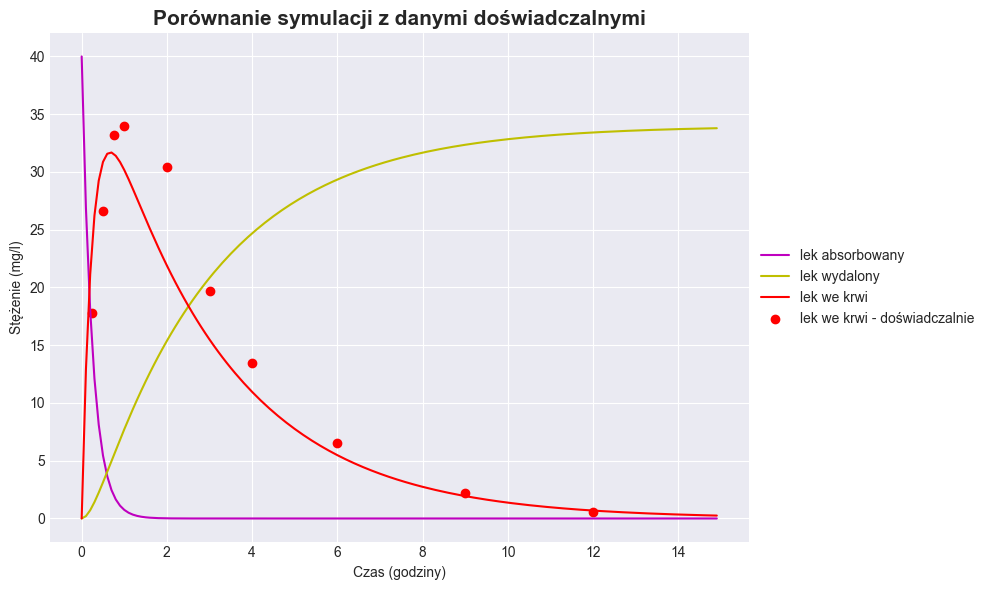

In [4]:
def ibuprofen_graph(initial_dose=40, elimination_rate=0.3465, absorption_rate=3.98721, bioavailability=0.85, time=15, grid=0.1):
    def equations(t, y):
        """Funkcja, która zwraca f(x,y) dla odpowiednich równań, aby później przygotować rozwiązania numeryczne."""
        y_absorption, y_elimination, y_blood = y
        dy_absorption = -absorption_rate * y_absorption
        dy_elimination = elimination_rate * y_blood * bioavailability
        dy_blood = absorption_rate * y_absorption - elimination_rate * y_blood
        return np.array([dy_absorption, dy_elimination, dy_blood])

    y_dose = [initial_dose, 0, 0]  # [lek w żołądku, lek wydalony z moczem, lek we krwi]

    # Stworzenie list z danymi doświadczalnymi: dane ilości we krwi
    x_experimental = [0.25, 0.5, 0.75, 1, 2, 3, 4, 6, 9, 12]
    y_experimental = [17.8, 26.6, 33.2, 34.0, 30.4, 19.7, 13.5, 6.5, 2.2, 0.6]

    # Rozwiązywanie równań i przyporządkowanie ich wyników do odpowiednich tablic
    x_values, y_values = runge_kutta(equations, y_dose, time, grid)
    y_stomach, y_eliminated, y_in_blood = y_values.T

    # Rysowanie wykresu
    plt.figure(figsize=(10, 6))
    plt.style.use('seaborn-v0_8-dark')

    # Wykres porównujący rozwiązanie analityczne i metodą Rungego-Kutty
    plt.plot(x_values, y_stomach, 'm', label="lek absorbowany")
    plt.plot(x_values, y_eliminated, 'y', label="lek wydalony")
    plt.plot(x_values, y_in_blood, 'r', label="lek we krwi")
    plt.scatter(x_experimental, y_experimental, color='r', label="lek we krwi - doświadczalnie")

    plt.title("Porównanie symulacji z danymi doświadczalnymi", fontweight='bold', fontsize=15)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True)
    plt.xlabel("Czas (godziny)")
    plt.ylabel("Stężenie (mg/l)")
    plt.grid()

    plt.tight_layout()
    plt.show()

ibuprofen_graph()

Jak widać na wykresie, dane rzeczywiste są zbliżone do naszej symulacji, ale nie pokrywają się całkowicie. Zapewne wynika to z wprowadzonych uproszczeń. Aby symulacje były bardziej dokładne, być może należałoby wprowadzić więcej parametrów lub skorzystać z bardziej precyzyjnego modelu.

## Podsumowanie
 W naszej pracy przedstawiliśmy podstawowe zagadnienia związane z modelem jednokompartmentowym. Co więcej, zaimplementowaliśmy i porównaliśmy ze sobą niektóre z metod rozwiązywania równań różniczkowych zwyczajnych, aby lepiej przedstawić zagadnienie. Dzięki temu udało nam się stworzyć model wchłaniania i eliminacji paracetamolu, oraz porównać go z danymi eksperymentalnymi. Należy wspomnieć, że w tej pracy skupiliśmy się tylko na jednym z wielu istniejących modelów farmakokinetycznych. Istnieją modele, które dadzą wyniki bardziej dokładne, jednak wymagają one więcej parametrów, danych i mocy obliczeniowej. Farmakokinetyka jest bardzo rozległą dziedziną farmacji korzystającą z metod matematycznych. Jest to jeden z wielu przykładów zastosowań równań rózniczkowych (i ogólnie, matematyki) w różnych dziedzinach nauki.

## Przypisy
[1]: W. Jawien, <a href="https://home.cyf-kr.edu.pl/~mfjawien/PKSoft/wprowadzenie.htm">*O modelowaniu farmakokinetycznym*</a>, ACK Cyfronet, Akademia Górniczo-Hutnicza w Krakowie; \
[2]: M. Gibaldi & D. Perrier, *Pharmacokinetics* (2nd ed.), CRC Press. (1982); \
[3]: A. Wiela-Hojeńska, <a href="https://www.umw.edu.pl/sites/default/files/struktura/farmacja/farmakologia/1_Farmakokinetyka.pdf">*Kinetyczna charakterystyka losów leków w organizmie*</a>, Uniwersytet Medyczny we Wrocławiu; \
[4]: <a href="https://web.archive.org/web/20160508185420/https://www.agah.eu/fileadmin/_migrated/content_uploads/PK-glossary_PK_working_group_2004.pdf">*Collection of terms, symbols, equations, and explanations of common pharmacokinetic and pharmacodynamic parameters and some statistical functions*</a>, AGAH working group (2004); \
[5]: M. Romański & A. Czyrski, <a href="https://www.ump.edu.pl/media/uid/0697-f0fadb562c7d742/1a1373.pdf">*Farmakokinetyka po jednorazowym i wielokrotnym podaniu dożylnym i doustnym w modelu jednokompartmentowym*</a>, Uniwersytet Medyczny w Poznaniu; \
[6]: Ł. Płociniczak, <a href="https://prac.im.pwr.edu.pl/~plociniczak/lib/exe/fetch.php?media=lecture.pdf">*Ordinary differential equations in science and technology*</a>, Politechnika Wrocławska; \
[7]: K. Szopa <a href="https://home.agh.edu.pl/~kszopa/wp-content/uploads/2021/12/MN_lab5.pdf">*Metody Numeryczne - Laboratorium 5. Rozwiązywanie równań różniczkowych I rzędu*</a>, Akademia Górniczo-Hutnicza w Krakowie (2020); \
[8]: <a href="https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://rejestrymedyczne.ezdrowie.gov.pl/api/rpl/medicinal-products/42421/characteristic&ved=2ahUKEwi--NS-1v-KAxWfGxAIHaA8CJQQFnoECBUQAQ&usg=AOvVaw33OhQBvFFQw5M7D1QyTjtD">*Charakterystyka produktu leczniczego Ibuprofen TZF*</a>, Tarchomińskie Zakłady Farmaceutyczne „Polfa” S.A.